In [4]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Visualization

Univariate Analysis

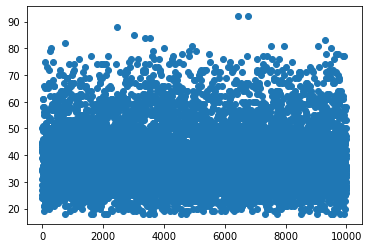

In [53]:
plt.scatter(df.index,df['Age'])
plt.show()

Bivariate analysis

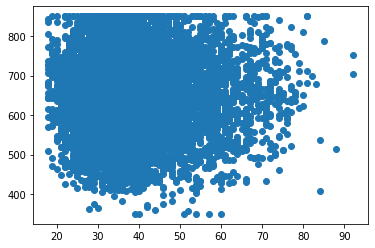

In [55]:
plt.scatter(df['Age'],df['CreditScore'])

Multivariate analysis

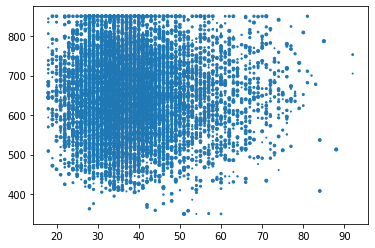

In [56]:
plt.scatter(df['Age'],df['CreditScore'],df['Tenure'])

Perform descriptive statistics on the dataset

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handling Missing values

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Find the outliers and replace the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


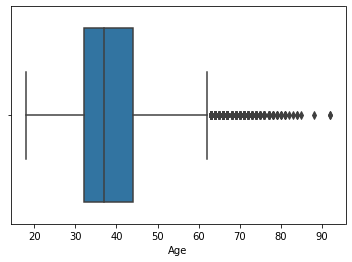

In [58]:
sns.boxplot(df['Age'])

Removing outliners

In [59]:
q=df.quantile(q=[0.75,0.5])

In [60]:
iqr=q.iloc[0]-q.iloc[1]

In [61]:
iqr

RowNumber           2499.7500
CustomerId         62495.7500
Surname              696.2500
CreditScore           66.0000
Geography              1.0000
Gender                 0.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [62]:
l=q.iloc[1]-(1.5*iqr)

In [63]:
l['Age']

26.5

In [64]:
u=q.iloc[1]+(1.5*iqr)

In [65]:
u['Age']

47.5

In [66]:
df['Age']=np.where(df['Age']>u['Age'],u['Age'],np.where(df['Age']<l['Age'],l['Age'],df['Age']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


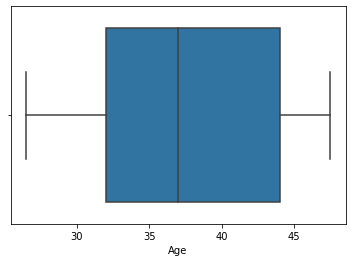

In [67]:
sns.boxplot(df['Age'])

Check for Categorical columns and perform encoding.

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
df['Gender']=df['Gender'].replace(['Male','Female'],[0,1])  #female=0 and male=1
df['Geography']=le.fit_transform(df['Geography'])
df['Surname']=le.fit_transform(df['Surname'])

In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Split the data into dependent and independent variables.

In [48]:
X=df.iloc[:,0:13]
Y=df.iloc[:,13:14]

In [44]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [45]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


Scale the independent variables

In [46]:
from sklearn.preprocessing import scale

In [49]:
scale(X)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

Split the data into training and testing

In [26]:
x = df.iloc[:,0:13].values
y = df.iloc[:,13:14].values

In [25]:
x

array([[1.0000000e+00, 1.5634602e+07, 1.1150000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [2.0000000e+00, 1.5647311e+07, 1.1770000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [3.0000000e+00, 1.5619304e+07, 2.0400000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [9.9980000e+03, 1.5584532e+07, 1.5700000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [9.9990000e+03, 1.5682355e+07, 2.3450000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+04, 1.5628319e+07, 2.7510000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [24]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=0,test_size=0.8)

In [31]:
xtrain


array([[3.4780000e+03, 1.5701908e+07, 1.9400000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 2.5904120e+04],
       [9.5680000e+03, 1.5696733e+07, 1.7560000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 8.9827500e+03],
       [8.2850000e+03, 1.5701741e+07, 2.8240000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 9.0305970e+04],
       ...,
       [3.2650000e+03, 1.5574372e+07, 1.2020000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [9.8460000e+03, 1.5664035e+07, 2.1220000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [2.7330000e+03, 1.5592816e+07, 2.6780000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

In [33]:
xtest

array([[9.3950000e+03, 1.5615753e+07, 2.6910000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 1.9285267e+05],
       [8.9900000e+02, 1.5654700e+07, 8.4600000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.2870210e+05],
       [2.3990000e+03, 1.5633877e+07, 1.8570000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 7.5732250e+04],
       ...,
       [4.9340000e+03, 1.5787597e+07, 1.2350000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 9.9046300e+03],
       [5.0500000e+02, 1.5715527e+07, 9.3300000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.9490216e+05],
       [1.0800000e+02, 1.5812878e+07, 2.1220000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 3.6976520e+04]])

In [35]:
xtrain.shape

(2000, 13)

In [36]:
xtest.shape

(8000, 13)

In [37]:
ytrain

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [38]:
ytest

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [40]:
ytrain.shape

(2000, 1)

In [41]:
ytest.shape

(8000, 1)